### Lab 2: Regression

We will look at Single Linear Regression, Multi-Linear Regression and a simpler Non-Linear Regression (Polynomial Regression). There are many advanced forms of regression that we won't touch upon including those using kernels, gaussian processes, neural nets, decision trees, xgboost etc. The idea here though is to get a thorough feel for key concepts. However gaining a quick familiarity with SciKit will enable you to play with more powerful models.

On the coding side we will use Python, Numpy, Pandas and SciKit Learn. Some of the simpler algorithms we will code up and then compare with Scikit's implementation.

Regression is a bit too broad to go through in one lab to be honest, but we will touch upon over-fitting and regularisation and try to give some intuitions, as well handling training data. For the most part we will either use the Normal equations or Scikit's library. The normal equations become unwieldy with large amounts of data, so at the end we will touch upon gradient descent.

If this is your first view of regression, Sci-Kit learn and Python then it is a big area, so don't worry too much. The main idea is to introduce some tools. The actual amount of code implementation is a small proportion of the notebook and for those less familiar with Python just understand the high level view of what is happening and be able to use the tools. 

### References

Some of the code in this tutorial originally comes from code accompanying 'Hand's on Machine Learning sith Scikit-Learn and Tensorflow', by Geron, also the complete tutorial to ridge regression and lasso in python.

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

A basic tutorial on Sci-Kit learn may be found at:

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

and 

https://www.youtube.com/watch?v=2kT6QOVSgSg



### Imports
Please do not change the cell below, you will see a number of imports. If a Data Scientist uses Python then numpy, pandas and matplotlib are pretty much guaranteed to be part of his toolbox. Scikit learn is a library containing various machine learning models, datasets and useful utilities for handling the data. If you continue in this area it is advisable to become familiar with them.

In [9]:
#PLEASE DO NOT CHANGE THIS CELL

#Standard python libraries for data and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#SciKit Learn a python ML Library
#Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Import error metric
from sklearn.metrics import mean_squared_error

#Import a dataset
from sklearn.datasets import load_boston, load_diabetes

#Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Display charts in the notebook
%matplotlib inline

### Create training data

We will begin by creating some linear data with gaussian noise added.

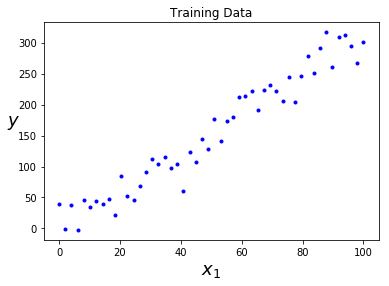

In [10]:
#PLEASE DO NOT CHANGE THIS CELL
#We will create some one dimensional data with a bit of noise
num_points = 50
# Generating evenly spread Xs
X = np.linspace(0,100,num_points).reshape(num_points,1)
# generating rondom target data for Xs with the second part being a nois
y = (4 + 3 * X) + 25*np.random.randn(num_points, 1)

#Plot the data, we want to divine a best fit
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Training Data')
plt.show()

### Linear Regression

The function below accepts training data X and targets y and returns best fit parameters theta. (In the case of a simple one dimensional regression for example, we will return two theta parameters, the bias and linear gradient).

Notice above that we have 50 training points, so X will be a numpy array of shape (50,1)

### To do: Write a function to fit the data and return optimal parameters

Return the best fit parameters theta, for a single linear regression this will be a numpy array of shape (2,1).

Steps:

a) Prepend a vector of ones onto the training data (to include the bias).

b) Calculate theta_best using the normal equation.

Consider making the function as general as possible by accepting higher dimensional inputs to save further work when you do multi-linear regression.


In [62]:
def simple_linear_regression(X, y):
    #[your code here]
    
    #Solution
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best


### Write a function to return predictions

### To do: 

Given parameters theta and data X_test, return predictions y_pred
(don't forget about the bias).

X_test will be of dimension (50,1), and in the case of single linear regression the return value theta of dimension (2,1)

In [63]:
def pred(theta, X_test):
    ones=np.ones(X_test.shape)
    X_test=np.append(ones,X,axis=1)
    y_test=theta.dot(X_test.T)
    return y_test

### Make the predictions on X

### To do: Use your two functions to create predictions given the data X

Call the variable containing the predictions ypred

In [64]:
#[your code here]
my_coeffs=simple_linear_regression(X,y)
print(my_coeffs)
ypred=pred(my_coeffs,X).T
print(ypred)

[[-2.80233111]
 [ 3.14371698]]


ValueError: shapes (2,1) and (2,50) not aligned: 1 (dim 1) != 2 (dim 0)

### Now use scikit learn

### To do:

1) Create a linear regression model

2) fit the model using X and y

3) Predict y given the fitted model and X - put this in variable y_lr

4) Calculate Mean squared errors for the hand coded and the scikit models, call the variables mse and mse_lr



In [65]:
#[your code here]
def typical_linear_regression(X,y):
    ones=np.ones(X.shape)
    X=np.append(ones,X,axis=1)
    reg = LinearRegression().fit(X,y)
    print("Score = ",reg.score(X,y))
    print("Coef = ", reg.coef_)
    return reg.predict(X)
#Solution
def calculate_mse(y_true,y_pred):
    mse = np.subtract(y_true.T,y_pred)
    mse = np.square(mse)
    mse = np.sum(mse)
    print(mse.shape)
#     mse = mse/
#     return(mse)
# print("From my model:",calculate_mse(y,y_lr))
print("From scikit lr model:\n",calculate_mse(y,ypred))
y_lr=typical_linear_regression(X,y)

()
From scikit lr model:
 None
Score =  0.9451845170874675
Coef =  [[0.         3.14371698]]


### Examine results:

Nothing to do here, if everything has been carried out correctly you should see the training data (as blue dots). The line of best fit from your own code ypred, and the best fit from your scikit learn implementation (green x's).

The red line should be a good fit to the blue training data and the green x's should be an exact match to the red line. The mean squared errors are also reported and should be essentially the same.

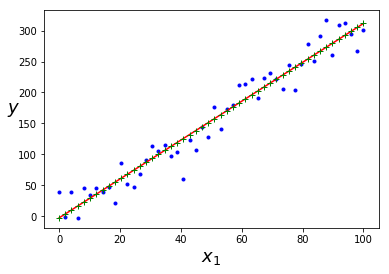

In [66]:
#PLEASE DO NOT CHANGE THIS CELL
#We wish to plot the variables you created ypred, y_lr
#Plot the predictions and MSE's - you should have a staight line fit and the line exactly
#matching the crosses through the data, the MSE's should also be equal to a large number of decimal places
plt.plot(X, y, 'b.')
plt.plot(X, ypred, 'r-')
plt.plot(X, y_lr, 'g+')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
# print("MSE - Sci kit",mse_lr,",","MSE - Hand-Coded",mse)

### Multiple Linear Regression

We will now examine multiple linear regression, this time we will go through the Scikit workflow. To avoid data cleaning/ munging etc. we will use the diabetes data from Scikit-learn. The dataset contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements from diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [67]:
##PLEASE DO NOT CHANGE THIS CELL: Load the diabetes data
diabetes = load_diabetes()
X_diabetes = diabetes['data']
y_diabetes = diabetes['target']

### End to End Diabetes

### To Do:

1) Create a train/test split - hint use train_test_split(), choose a test_sise=0.2, and a random_state=42, call the variable containing the test targets y_test.

2) Linear regression parameter outputs are dependent on the scale of the features, use the StandardScalar to fit/ transform the training data and to fit the test data. (Why do we not also fit on the test data?)

3) Create a linear regression model, fit it, and store predictions for X_test in a variable called y_lr_diabetes.

4) How good is your trained model on the test data? Calculate the mean squared error between y_test and y_lr_diabetes, store the result in a variable called mse_lr_diabetes.

In [68]:
#[your code here]: Split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
# diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
#                      columns= diabetes['feature_names'] + ['target'])

#[your code here]: Standardise
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#[your code here]: Fit
linreg = LinearRegression()
a=linreg.fit(X_train, y_train)
print("Linear regression coefficients:\n", a.coef_)

#[your code here]: MSE
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)


Linear regression coefficients:
 [  1.75358647 -11.51189881  25.60697957  16.82909953 -44.44753934
  24.64008688   7.676205    13.13840865  35.16068784   2.35138623]
2900.1732878832313


### Now use your own model as before.

If you already coded your function to handle multiple dimensions you have no alterations to make to the simple linear regression function, otherwise you will need to generalise a little for higher dimensional data.

### To Do:

1) Use the simple linear regression function with training inputs from your standard scalar to fit parameters theta

2) Make your predictions given your parameters and input test data

3) Calculate the mean squared errors of your predictions

Store your predictions for X_test in a variable called y_pred_diabetes

In [69]:
#[your code here]
simple_linear_regression(X_train,y_train)

array([153.73654391,   1.75358647, -11.51189881,  25.60697957,
        16.82909953, -44.44753934,  24.64008688,   7.676205  ,
        13.13840865,  35.16068784,   2.35138623])

### Examine results - Your model v Scikit

Because we are dealing with multiple dimensions visualisation is less simple, below we show our model compared the the Scikit learn version, we will do a scatter graph against the y_test results. We would hope the pattern is close to identical. 

We also show the mean squared errors on the test set of the two models which should be the same to a high precision.

NameError: name 'ypred_diabetes' is not defined

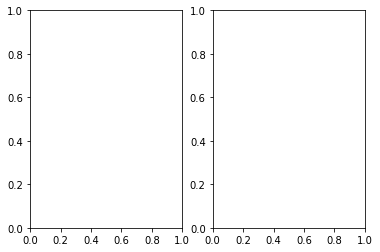

In [70]:
##PLEASE DO NOT CHANGE THIS CELL

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].scatter(ypred_diabetes,y_test)
axes[0].set_title("Linear Regression")
axes[1].scatter(y_lr_diabetes,y_test)
axes[1].set_title("SKLearn Linear Regression")


print("MSE-hand coded",mse_ypred_diabetes, "MSE-Sci-Kit",mse_lr_diabetes)

### Non-Linear Regression by hand

We will now examine non-linear regression, here using basic polynomial features, the underlying function is a cubic, again noise is added. In terms of training our model only sees the noisy data. The 'ground truth', test data would be the underlying cubic.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

num_points = 50
X = np.linspace(-3,5,num_points).reshape(num_points,1) 
y_clean = X**3 
y = y_clean + 25*np.random.randn(num_points, 1)

### To Do:

Scale the training data X using the standard scalar. Store in X

In [ ]:
#[your code here]


### Nothing to do, we will plot the scaled training data.

The x axis should have been rescaled with axis extremes around -1.5/1.5

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

#Plot the data
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### For interest only 

In the cell below we show the training data X, the training targets y and the features we would use for polynomial regression. It is simply a linear regression with input features transformed, we create these to hand-code the Scikit implementation above. In the cell below we show the input features used for the regression.

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
data = pd.DataFrame(np.column_stack([X,y]),columns=['X','y'])


for i in range(2,30):  
    colname = 'X_%d'%i      
    data[colname] = data['X']**i
print(data.head())

### For interest only 

Here we have a function that performs linear regression and plots and calculates the residual sum of squares on a number of polynomial models.

### Question:

What is the residual sum of squares? How is it different to mean squared error and why do we care about all these error functions? If we performed classification would we have a different error function for example?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
def linear_regression(data, power, models_to_plot):
    predictors=['X']
    if power>=2:
        predictors.extend(['X_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression() #normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['y'],'.')
        #plt.plot(data['X'],y_clean)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

### Results

In the cell below we show the fit for a number of polynomials of varying degrees. 

### Question:

Which do you think show bias? And which over-fitting?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_X_%d'%i for i in range(1,30)]
ind = ['model_pow_%d'%i for i in range(1,30)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,12:234,18:235,29:236}

#Iterate through all powers and assimilate results
for i in range(1,30):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

#### Coefficient Matrix

The cell below shows the residual sum of squares and coefficients for each of the regressions. For example the cubic has an intercepts and three coeffients. 

### Questions:

1) What do you notice about the residual sum of squares as the degree of the polynomial increases?

2) What do you notice about the size of the coefficents as the degree of the polynomial increases?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
coef_matrix_simple

### Linear Regression using Gradient Descent

### In reality managing calculating parameters by using the normal equation becomes unwieldy as data scales:

\begin{align}
\theta = (X'X)^{-1}Xy
\end{align}

1) Why is this?

Alternative methods are to use gradient descent. In the example below we wish to fit the data using batch gradient descent. 

### To Do:

Be sure of the differences between batch, mini-batch and stochastic gradient descent.


To keep things straightforward we shall go back to our original linear data plus noise.

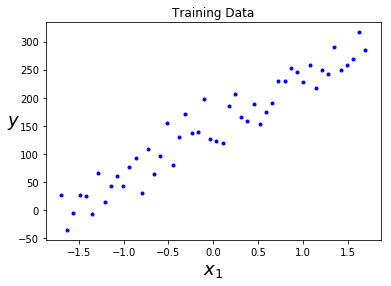

In [71]:
#PLEASE DO NOT CHANGE THIS CELL
num_points = 50
X = np.linspace(0,100,num_points).reshape(num_points,1)
y = (4 + 3 * X) + 25*np.random.randn(num_points, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Plot the data, we want to divine a best fit
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Training Data')
plt.show()

### Implement batch gradient descent

### To Do:

1) Derive the gradient of the error with respect to parameters in linear regression.

2) Implement gradient linear regression in code. 

### Hints...

2a) First add a bias as you did previously

2b) Create a loop ranging to the number of iterations we wish to perform (n_iterations)

2c) Calculate the gradients in the loop

2d) Update variable theta_best by taking a step-size eta in the opposite direction to the gradient.

In [ ]:
def gradient_linear_regression(X, y, n_iterations):
    eta = 0.01
    n_iterations = n_iterations 
    m = X.shape[0]
    theta_best = np.random.randn(X.shape[1]+1,1)
    
    #[your code here]
    
    
    

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
theta_best_10 = gradient_linear_regression(X, y,10)
theta_best_30 = gradient_linear_regression(X, y,30)
theta_best_50 = gradient_linear_regression(X, y,30)
theta_best_100 = gradient_linear_regression(X, y,100)
theta_best_500 = gradient_linear_regression(X, y,500)

ypred_10 = pred(theta_best_10,X)
ypred_30 = pred(theta_best_30,X)
ypred_50 = pred(theta_best_50,X)
ypred_100 = pred(theta_best_100,X)
ypred_500 = pred(theta_best_500,X)

### Results Batch gradient descent

The training data is fitted by linear regression with gradient descent, however we have used a different number of epochs. That is the number of iterations before we stop learning.

### Questions:

1) What do you notice as the epochs increase?

2) How would you decide the number of epochs to perform?

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL
plt.plot(X, y, 'b.', label='Training Data')
plt.plot(X, ypred_10, label='Prediction 10 epochs')
plt.plot(X, ypred_30, label='Prediction 30 epochs')
plt.plot(X, ypred_50, label='Prediction 50 epochs')
plt.plot(X, ypred_100,label='Prediction 100 epochs')
plt.plot(X, ypred_500, label='Prediction 500 epochs')


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()